In [165]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [166]:
df = pd.read_csv("C:/Users/ganes/OneDrive/Documents/drugs_side_effects_drugs_com.csv")

In [167]:
df_encoded = pd.get_dummies(df, columns=['drug_name', 'medical_condition', 'drug_classes'])

In [168]:
print(df.dtypes)

drug_name                         object
medical_condition                 object
side_effects                      object
generic_name                      object
drug_classes                      object
brand_names                       object
activity                          object
rx_otc                            object
pregnancy_category                object
csa                               object
alcohol                           object
related_drugs                     object
medical_condition_description     object
rating                           float64
no_of_reviews                    float64
drug_link                         object
medical_condition_url             object
dtype: object


In [169]:
# Check for missing values in the target variable
print(y.isna().sum())  # This will show how many NaN values are present in y


1345


In [170]:
df_encoded = df_encoded.dropna(subset=['rating'])

In [171]:
df_cleaned = df.drop(columns=['side_effects', 'related_drugs', 'drug_link', 'medical_condition_description'])


In [172]:
df_encoded = pd.get_dummies(df_cleaned, columns=['drug_name', 'medical_condition', 'drug_classes', 'pregnancy_category'])

In [173]:
non_numeric_cols = df_cleaned.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_cols)

Non-numeric columns: Index(['drug_name', 'medical_condition', 'generic_name', 'drug_classes',
       'brand_names', 'activity', 'rx_otc', 'pregnancy_category', 'csa',
       'alcohol', 'medical_condition_url'],
      dtype='object')


In [174]:
df_encoded = pd.get_dummies(df_cleaned, columns=non_numeric_cols)

In [175]:
X = df_encoded.drop(['rating'], axis=1)
y = df_encoded['rating']

In [176]:
print("Missing values in target variable:", y.isna().sum())

Missing values in target variable: 1345


In [177]:
df_encoded = df_encoded.dropna(subset=['rating'])

In [178]:
from sklearn.model_selection import train_test_split

In [179]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [180]:
print("Missing values in y_train:", y_train.isna().sum())

Missing values in y_train: 1071


In [181]:
y_train.fillna(y_train.median(), inplace=True)

In [182]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [183]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [184]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [185]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [186]:
X_columns = X_train.columns 

In [187]:
import joblib
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(model, 'drug_reaction_model.pkl')

['drug_reaction_model.pkl']

In [188]:
joblib.dump(X_columns, 'feature_columns.pkl')

['feature_columns.pkl']

In [189]:
model = joblib.load('drug_reaction_model.pkl')
scaler = joblib.load('scaler.pkl')
X_columns = joblib.load('feature_columns.pkl')

In [190]:
import pandas as pd

In [191]:
user_input = {
    'drug_name': 'doxycycline',
    'medical_condition': 'Acne',
    'drug_classes': 'Tetracyclines',
    'activity': 87,
    'pregnancy_category': 'D'
}

In [192]:
user_data = pd.DataFrame([user_input])
user_data_encoded = pd.get_dummies(user_data)

In [193]:
user_data_encoded = user_data_encoded.reindex(columns=X_columns, fill_value=0)

In [194]:
user_data_scaled = scaler.transform(user_data_encoded)

In [195]:
prediction = model.predict(user_data_scaled)
print(f"Predicted Rating: {prediction[0]}")

Predicted Rating: 9.295


In [196]:
import matplotlib.pyplot as plt
import seaborn as sns

In [197]:
y_pred = model.predict(X_test_scaled)

C:\Users\ganes\AppData\Local\Temp\ipykernel_26844\1603868264.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')


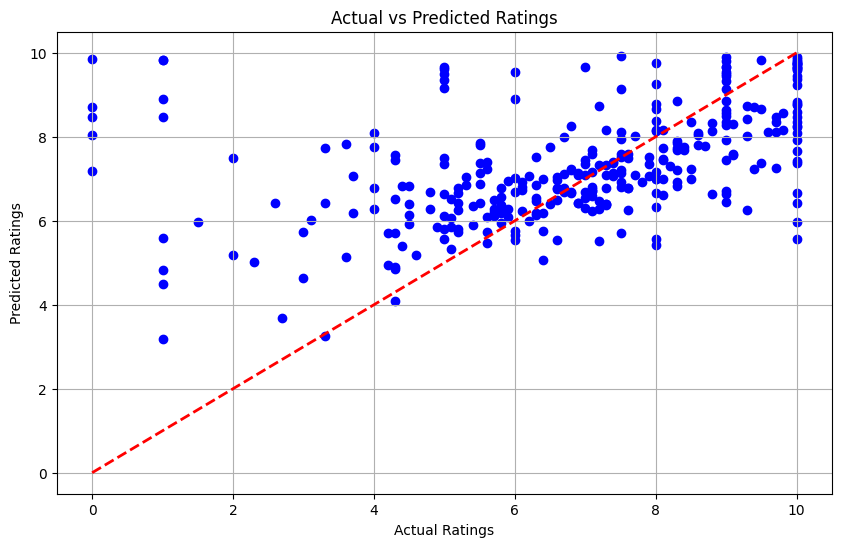

In [198]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')
plt.title('Actual vs Predicted Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.grid(True)
plt.show()

In [199]:
importances = model.feature_importances_

In [200]:
feature_importance_df = pd.DataFrame({
    'Feature': X_columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)


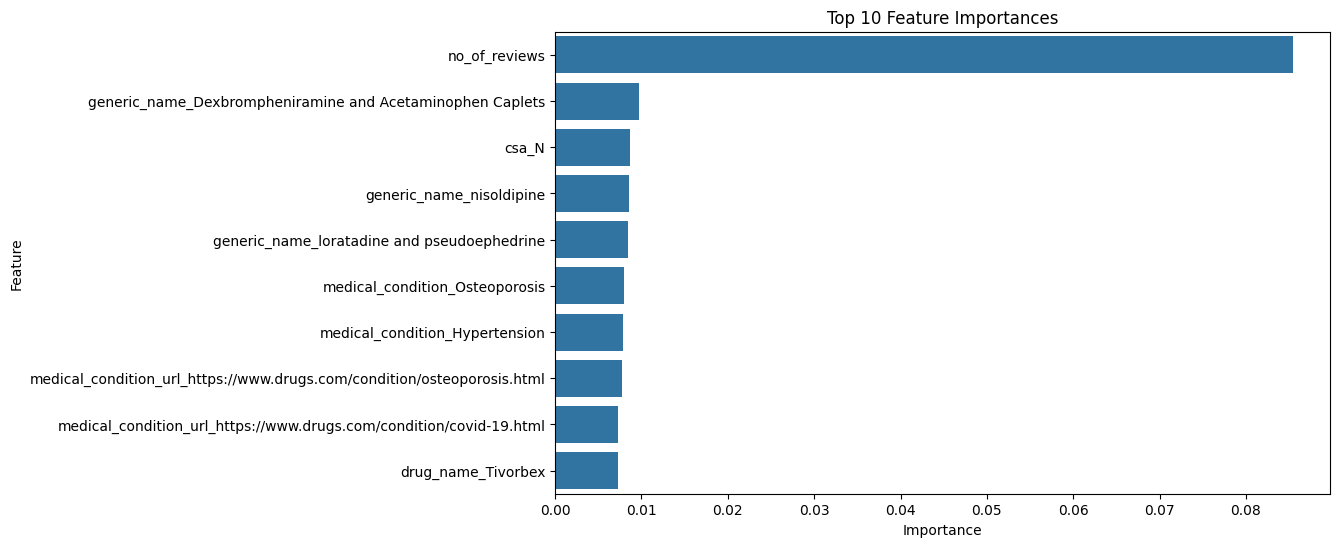

In [201]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [202]:
residuals = y_test - y_pred

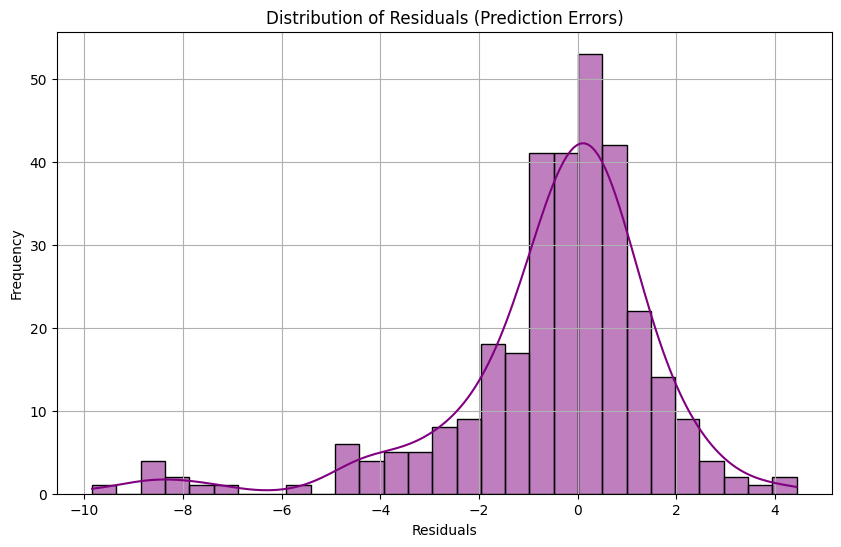

In [203]:
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='purple')
plt.title('Distribution of Residuals (Prediction Errors)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

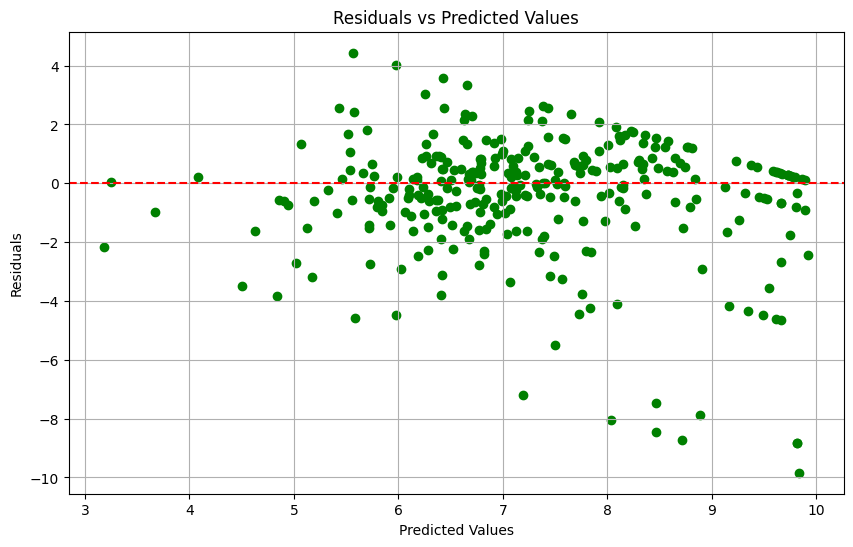

In [204]:
# Scatter plot of residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='green')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()


In [208]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import numpy as np

In [210]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [213]:
param_distributions = {
    'n_estimators': np.arange(50, 201, 50),  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],         # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],         # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]            # Minimum number of samples required to be at a leaf node
}

In [214]:
random_search = RandomizedSearchCV(model, param_distributions, n_iter=10, cv=5, n_jobs=-1, verbose=2, random_state=42)

In [ ]:
random_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [215]:
print("Best Parameters:", random_search.best_params_)

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_params_'